In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [66]:
#lets load the dataset
(xtrain,ytrain),(xtest,ytest)=keras.datasets.cifar10.load_data()

In [8]:
xtrain.shape  #third dimension is rgb

(50000, 32, 32, 3)

In [9]:
xtrain[0].shape

(32, 32, 3)

In [10]:
xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
ytrain[0]   #this 6 means frog

array([6], dtype=uint8)

In [12]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

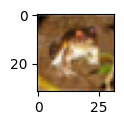

In [13]:
plt.figure(figsize=(13,1))
plt.imshow(xtrain[0])

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
classes[ytrain[2][0]]

'truck'

In [16]:
#lets scale the data

In [17]:
xtrain=xtrain/255
xtest=xtest/255

In [18]:
xtrain

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [19]:
#data has been scaled
#now we we will use one hot encoding to divide ytrain and ytest into categories

In [20]:
ytrain

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [21]:
type(ytrain)

numpy.ndarray

In [22]:
#converting ytrain into categorical values for more precision though without it also this would work nnnu with less precision

In [23]:
ytrain_cate=keras.utils.to_categorical(ytrain,num_classes=10)

In [24]:
ytrain_cate

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
ytest_cate=keras.utils.to_categorical(ytest,num_classes=10)

In [26]:
ytest_cate

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [27]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

In [28]:
model.compile(optimizer="SGD",loss="categorical_crossentropy",metrics=["accuracy"])   #WE USE

In [29]:
model.fit(xtrain,ytrain_cate,epochs=5)  #epoch can be increased but since we are not using gpu epoch is kept low in turn accuracy is low

Epoch 1/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.8119 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.6246 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5424 - accuracy: 0.4539
Epoch 4/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.4814 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.4327 - accuracy: 0.4939


In [30]:
model.evaluate(xtrain,ytrain_cate)

1563/1563 [==============================] - 26s 17ms/step - loss: 1.5317 - accuracy: 0.4563


[1.5317041873931885, 0.456279993057251]

In [41]:
ypred=model.predict(xtest)

313/313 [==============================] - 5s 17ms/step


In [42]:
ypred

array([[0.3378317 , 0.7911079 , 0.6118511 , ..., 0.09859394, 0.8412278 ,
        0.11170149],
       [0.89865124, 0.99195534, 0.23630539, ..., 0.11133526, 0.9949245 ,
        0.98453003],
       [0.9773822 , 0.96995634, 0.37218216, ..., 0.16649562, 0.9925237 ,
        0.9369812 ],
       ...,
       [0.12248673, 0.07854079, 0.8473991 , ..., 0.5419531 , 0.48843548,
        0.19385836],
       [0.52516   , 0.5695236 , 0.7216048 , ..., 0.34084943, 0.29086554,
        0.29440835],
       [0.617588  , 0.5340551 , 0.6295419 , ..., 0.7647843 , 0.48661336,
        0.41944993]], dtype=float32)

In [68]:
ypred=[np.argmax(i) for i in ypred]

In [69]:
ypred

[8,
 8,
 8,
 8,
 4,
 6,
 1,
 4,
 4,
 1,
 8,
 9,
 1,
 7,
 1,
 8,
 1,
 9,
 8,
 6,
 1,
 0,
 0,
 1,
 4,
 8,
 1,
 0,
 1,
 6,
 6,
 4,
 8,
 5,
 9,
 1,
 4,
 1,
 1,
 8,
 8,
 6,
 9,
 4,
 0,
 8,
 5,
 8,
 4,
 4,
 9,
 8,
 6,
 3,
 8,
 8,
 7,
 8,
 8,
 4,
 4,
 3,
 1,
 1,
 6,
 2,
 1,
 8,
 5,
 9,
 4,
 4,
 8,
 8,
 0,
 4,
 9,
 5,
 3,
 8,
 8,
 1,
 1,
 8,
 0,
 7,
 8,
 8,
 8,
 8,
 8,
 4,
 8,
 6,
 4,
 5,
 4,
 8,
 0,
 9,
 4,
 4,
 6,
 3,
 1,
 1,
 5,
 6,
 8,
 7,
 4,
 0,
 6,
 4,
 1,
 1,
 0,
 9,
 2,
 5,
 8,
 4,
 1,
 2,
 8,
 1,
 8,
 5,
 4,
 0,
 4,
 1,
 1,
 9,
 1,
 1,
 9,
 7,
 6,
 8,
 1,
 1,
 1,
 1,
 8,
 2,
 6,
 5,
 5,
 5,
 8,
 1,
 8,
 8,
 0,
 5,
 2,
 8,
 3,
 0,
 0,
 1,
 1,
 4,
 8,
 9,
 8,
 4,
 9,
 0,
 1,
 0,
 1,
 8,
 9,
 9,
 8,
 5,
 1,
 8,
 1,
 7,
 6,
 8,
 5,
 8,
 6,
 6,
 7,
 8,
 4,
 1,
 5,
 1,
 7,
 4,
 8,
 8,
 7,
 8,
 3,
 8,
 8,
 7,
 1,
 4,
 8,
 4,
 7,
 8,
 5,
 1,
 1,
 7,
 8,
 1,
 8,
 9,
 8,
 4,
 7,
 3,
 1,
 3,
 9,
 9,
 9,
 4,
 3,
 1,
 3,
 1,
 1,
 1,
 8,
 0,
 4,
 0,
 8,
 5,
 1,
 1,
 9,
 8,
 0,
 1,
 7,
 0,
 2,
 1,


In [70]:
yt=[int(i) for i in ytest]

In [71]:
yt

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 5,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 2,
 4,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 0,
 3,
 8,
 8,
 7,
 7,
 4,
 6,
 7,
 3,
 6,
 3,
 6,
 2,
 1,
 2,
 3,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 5,
 2,
 7,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 6,
 2,
 1,
 3,
 0,
 4,
 2,
 7,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 5,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 9,
 6,
 5,
 6,
 3,
 8,
 7,
 6,
 2,
 5,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 4,
 5,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 3,
 8,
 6,
 3,
 4,
 0,
 5,
 8,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 4,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 6,
 9,
 4,
 3,
 9,
 6,
 4,
 7,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 5,
 5,
 1,
 1,
 8,
 9,
 0,
 3,
 1,
 9,
 2,
 2,


In [72]:
tf.math.confusion_matrix(yt,ypred)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[385, 114,  16,   2,  40,   6,  14,   6, 395,  22],
       [  8, 802,   2,   2,  13,   6,   8,   9, 105,  45],
       [ 86,  93, 174,  31, 290,  54,  68,  36, 148,  20],
       [ 38, 187,  45, 155, 127, 141,  84,  27, 138,  58],
       [ 55,  79,  48,  13, 558,  27,  62,  36, 111,  11],
       [ 22, 123,  57,  84, 147, 293,  55,  49, 137,  33],
       [ 12, 108,  32,  22, 241,  38, 440,  16,  72,  19],
       [ 49, 117,  29,  17, 150,  39,  21, 414,  89,  75],
       [ 18, 118,   1,   1,  15,   4,   1,   2, 812,  28],
       [ 17, 431,   2,   7,   6,   8,  13,  12, 171, 333]])>

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(yt,ypred)

0.4366

In [84]:
instant=model.predict(xtest)[0]

313/313 [==============================] - 6s 20ms/step


In [87]:
instant

array([1.6254391e-24, 1.0000000e+00, 1.2840403e-11, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 2.0108209e-16, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00], dtype=float32)

In [89]:
pred=np.argmax(instant)

In [97]:
pred

1

In [91]:
actual=ytest[0]

In [95]:
actual[0]

3

In [93]:
classes[pred]

'automobile'

In [96]:
classes[actual[0]]

'cat'